# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nizar Rafi Pratama
- **Email:** Nizarrafipratama@gmail.com
- **ID Dicoding:** nizarafi

## Menentukan Pertanyaan Bisnis

- Pada Musim apa rata-rata penyewaan sepeda mencapai angka tertinggi dan angka terendah?
- Pada jam berapa jumlah rata-rata peminjaman sepeda mencapai jam tertinggi dan kenapa?

## Import Semua Packages/Library yang Digunakan

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca CSV

In [89]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [90]:
hour = pd.read_csv("hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Melakukan pengecekan data

In [91]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan tipe data untuk kolom dteday

In [92]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [93]:
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


In [94]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [95]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data untuk kolom dteday.

In [96]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [97]:
print("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0


In [98]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Membersihkan data supaya lebih mudah diolah

In [99]:
#Mengubah beberapa detail tentang kolom pada day
day.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'count'
}, inplace=True)

day.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [100]:
#Mengubah beberapa detail tentang kolom pada hour
hour.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'cnt': 'count',
    'hr' : 'hour'
}, inplace=True)

hour.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [101]:
# Mengubah angka pada day menjadi keterangan
day['month'] = day['month'].map({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
})
day['season'] = day['season'].map({
    1: 'Winter',
    2: 'Summer',
    3: 'Fall',
    4: 'Spring'
})
day['weekday'] = day['weekday'].map({
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'
})
day['weather'] = day['weather'].map({
    1: 'clear',
    2: 'cloudy',
    3: 'rain',
    4: 'heavy_rain'
})

In [102]:
# Mengubah angka pada hour menjadi keterangan
hour['month'] = hour['month'].map({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
})
hour['season'] = hour['season'].map({
    1: 'Winter',
    2: 'Summer',
    3: 'Fall',
    4: 'Spring'
})
hour['weekday'] = hour['weekday'].map({
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'
})
hour['weather'] = hour['weather'].map({
    1: 'clear',
    2: 'cloudy',
    3: 'rain',
    4: 'heavy_rain'
})

In [103]:
# Mengubah tipe data ke datetime
day['dateday'] = pd.to_datetime(day.dateday)

# Mengubah tipe data ke category
day['season'] = day.season.astype('category')
day['year'] = day.year.astype('category')
day['month'] = day.month.astype('category')
day['holiday'] = day.holiday.astype('category')
day['weekday'] = day.weekday.astype('category')
day['workingday'] = day.workingday.astype('category')
day['weather'] = day.weather.astype('category')

day.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Winter,0,Jan,0,Sat,0,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,Jan,0,Sun,0,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,Jan,0,Mon,1,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,Jan,0,Tue,1,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,Jan,0,Wed,1,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [104]:
# Mengubah tipe data ke datetime
hour['dateday'] = pd.to_datetime(hour.dateday)

# Mengubaha tipe data ke category
hour['season'] = hour.season.astype('category')
hour['year'] = hour.year.astype('category')
hour['month'] = hour.month.astype('category')
hour['holiday'] = hour.holiday.astype('category')
hour['weekday'] = hour.weekday.astype('category')
hour['workingday'] = hour.workingday.astype('category')
hour['weather'] = hour.weather.astype('category')

hour.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Winter,0,Jan,0,0,Sat,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,Jan,1,0,Sat,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,Jan,2,0,Sat,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,Jan,3,0,Sat,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,Jan,4,0,Sat,0,clear,0.24,0.2879,0.75,0.0,0,1,1


In [105]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: category(7), datetime64

In [106]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [107]:
day.groupby('season')['count'].sum().reset_index()

,season,count
0,Fall,1061129
1,Spring,841613
2,Summer,918589
3,Winter,471348


In [108]:
hour.groupby('hour')['count'].mean().reset_index()

,hour,count
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada Musim apa, rata-rata penyewaan sepeda mencapai angka tertinggi dan angka terendah?

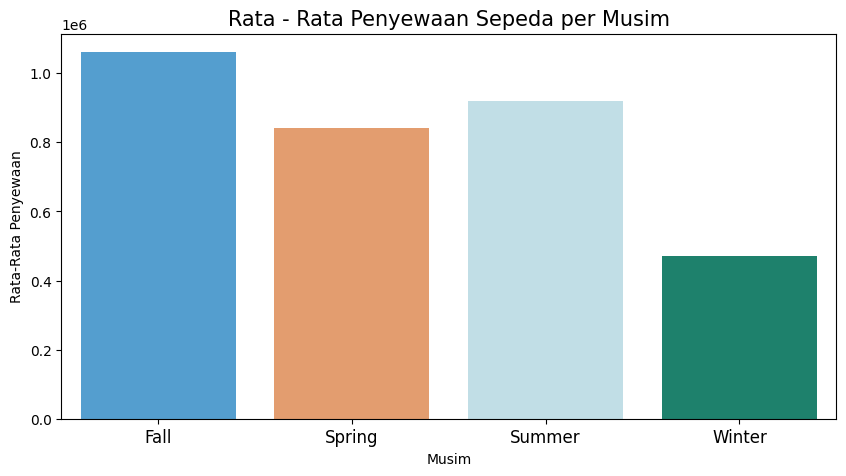

In [109]:
rent_season = day.groupby('season')['count'].sum().reset_index()

colors = ['#40A2E3', '#F6995C', '#BBE2EC', '#0D9276']
plt.figure(figsize=(10, 5))

sns.barplot(
    y="count",
    x="season",
    hue="season",
    data=rent_season,
    palette=colors,
    legend=False
)
plt.title("Rata - Rata Penyewaan Sepeda per Musim", loc="center", fontsize=15)
plt.ylabel("Rata-Rata Penyewaan")
plt.xlabel("Musim")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: rata-rata peminjaman sepeda tertinggi terjadi di jam berapa dana kenapa?

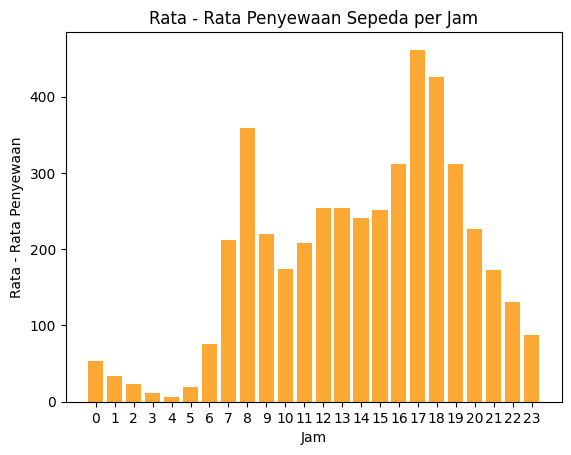

In [110]:
#Visualisasi
rental_jam = hour.groupby('hour')['count'].mean()
plt.bar(rental_jam.index, rental_jam.values, color='#FBA834')
plt.title('Rata - Rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata - Rata Penyewaan')
plt.xticks(range(0, 24))
plt.show()

## Conclusion

- **Conclution pertanyaan 1:**
Dari analisis diatas dapat disimpulkan bahwa musim gugur (fall) memiliki rata-rata peminjaman sepeda paling tinggi , sementara musim dingin(Winter) memiliki rata-rata peminjaman paling rendah. Menurut saya hal itu dapat terjadi karena suasana saat musim gugur cocok untuk berpergian menggunakan sepeda.Sedangkan saat musim dingin, orang-orang cenderung untuk berdiam diri dan tidak berpergian menggunakan sepeda.

- **Conclution pertanyaan 2:**
Dari analisis diatas dapat disimpulkan bahwa rata-rata peminjaman sepeda tertinggi ada di jam 17.00. Hal ini menandakan bahwa aktivitas yang terjadi di jam tersebut cenderung padat. Menurut saya hal itu dapat terjadi karena jam 17.00 merupakan jam dimana orang orang pulang dari aktivitasnya, baik itu bekerja maupun bersekolah.